# load saved episode data and test plotting functions

Load the necessary library

In [1]:
import numpy as np
import os

import pandas as pd

from plot_experiment import plot_episode_data_virtual
from eval_metrics import success_rate_from_distances
import matplotlib.pyplot as plt
import seaborn as sns
from plot_experiment import plot_episode_data_virtual, plot_one_episode


In [4]:
load_dir = "../evaluations/icra24/expR/"
experiments = os.listdir(load_dir)
# remove the .png files or .csv files
experiments = [experiment for experiment in experiments if ".png" not in experiment and ".csv" not in experiment]
print(experiments)
# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

['nominal_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_expRew', 'nominal_GoToXY_MLP_expRew_PE_0.03']


In [12]:
all_obs = [pd.read_csv(load_dir + experiment + "/" + ep + "/states_episode.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]
all_obs[0].head() 

,Unnamed: 0,cos_theta,sin_theta,lin_vel_x,lin_vel_y,ang_vel_z,task_flag,error_x,error_y
0,0,0.549617,0.835417,0.036813,0.007596,-2.643061e-13,0.0,3.786025,1.925616
1,1,0.549617,0.835417,0.073625,0.015193,2.903033e-13,0.0,3.774620,1.923261
2,2,0.549617,0.835417,0.110438,0.022789,-7.943598e-14,0.0,3.755842,1.919386
3,3,0.549617,0.835417,0.147251,0.030385,3.386873e-12,0.0,3.729711,1.913992
4,4,0.521614,0.853182,0.183984,0.038347,3.015100e-01,0.0,3.696217,1.907059


In [25]:
episode_0 = all_obs[0].to_numpy()
plot_one_episode(episode_0, save_dir=None, show=True)

TypeError: plot_one_episode() got an unexpected keyword argument 'show'

In [6]:
print(all_actions[0].shape)

(500, 9)


In [7]:
print(len(all_actions))
for i in range(len(all_actions)):
    all_actions[i].drop(columns=["Unnamed: 0"], inplace=True)

all_actions[0].head()

12


,0,1,2,3,4,5,6,7
0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [8]:
# Find the episode where the sum of actions has only zeros (no action) for all the time steps
#all_actions = np.array(all_actions)
broken_episodes = [i for i in range(len(all_actions)) if np.array(all_actions)[i,:].sum() == 0]
# Remove episodes that are broken by the environment (IsaacGym bug)
if broken_episodes:
    print(f'Broken episodes: {broken_episodes}')

Broken episodes: [1, 6, 10]


In [9]:
all_actions[2].shape

(500, 8)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

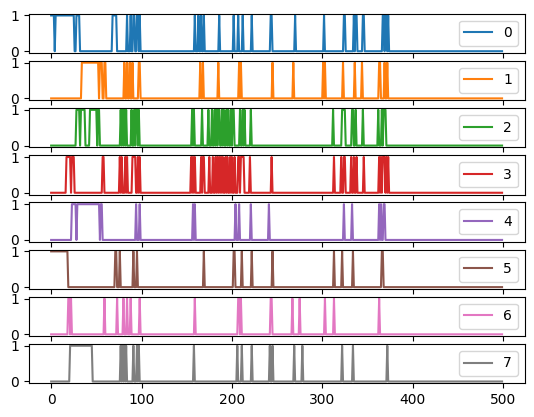

In [10]:

all_actions[0].plot(subplots=True)

<BarContainer object of 8 artists>

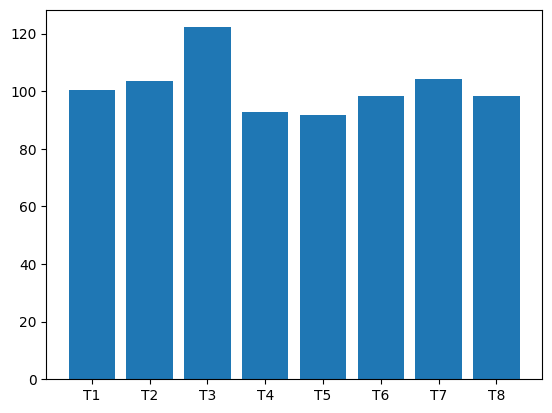

In [8]:
freq = pd.DataFrame(data=np.array([all_actions[i].sum() for i in range(len(all_actions))]), 
                    columns=[f'T{i+1}' for i in range(8)])

mean_freq = freq.mean()
mean_freq.shape
plt.bar(mean_freq.index, mean_freq.values)


<AxesSubplot:>

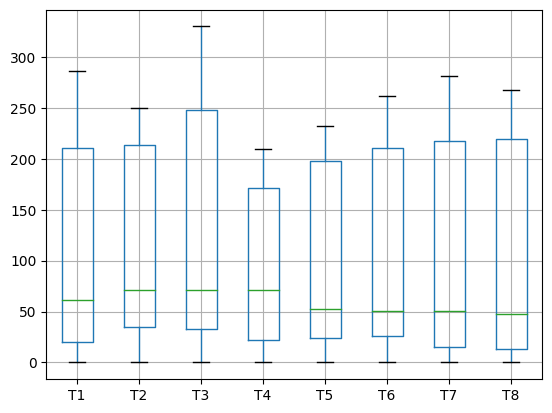

In [9]:
freq.boxplot()

<AxesSubplot:>

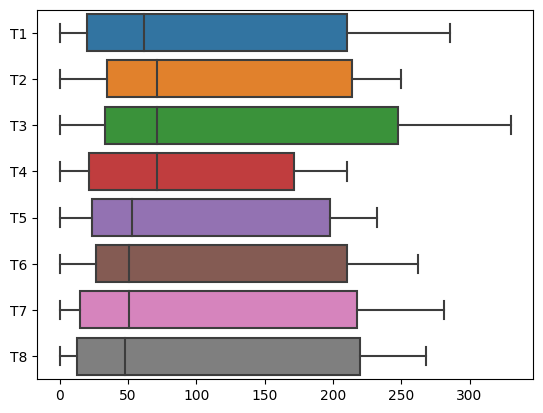

In [10]:
sns.boxplot(data=freq, orient="h")

In [11]:
all_actions[0].describe()

,0,1,2,3,4,5,6,7
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.13200,0.092000,0.124000,0.122000,0.092000,0.070000,0.040000,0.086000
std,0.33883,0.289315,0.329912,0.327614,0.289315,0.255403,0.196155,0.280645
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Old Models

In [29]:
res_multi_new_mass = pd.read_csv("../evaluations/new_mass/multi_model_performance.csv", index_col=[0])
res_multi_new_mass

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_0.5_PLV_0.05_5kg,100.000000,100.000000,98.015873,0.849471,-2.250901,136.81350
1,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.031496,0.844257,-2.298851,137.74300
2,MLP_GTXY_UF_0.25_ST_PE_0.025_PAV_0.5_PLV_0.025...,100.000000,100.000000,99.218750,0.846306,-2.259960,138.54775
3,MLP_GTXY_UF_0.25_ST_PE_0.025_PAV_1.0_PLV_0.025...,100.000000,100.000000,97.656250,0.846964,-2.265940,138.71400
4,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_0.5_PLV_0.01_5kg,100.000000,100.000000,95.686275,0.846280,-2.298928,137.90700
5,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_1.0_PLV_0.01_5kg,100.000000,100.000000,98.039216,0.846008,-2.240409,138.64475
6,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_1.0_PLV_0.05_5kg,100.000000,100.000000,99.604743,0.844463,-2.278868,137.14525
7,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.023715,0.846573,-2.297946,137.34125
8,MLP_GTXY_UF_0.25_ST_PE_0.03_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.000000,0.845570,-2.272622,135.45175
9,MLP_GTXY_UF_0.5_ST_PE_0.01_PAV_0.5_PLV_0.01_5kg,100.000000,100.000000,100.000000,0.830302,-6.525306,109.06000


## New Multi model evaluation

### Linear Reward

In [3]:
res_multi_linR = pd.read_csv("../evaluations/icra24/linR/multi_model_performance.csv", index_col=[0])
res_multi_linR

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_lin_vel,avg_action_count
0,nominal_GoToXY_MLP_linRew_PE_0.04,100.0,100.0,98.804781,0.811186,4.866467,0.943815,21.26050
1,nominal_GoToXY_MLP_linRew_PE_0.05,100.0,100.0,99.596774,0.805782,5.465705,1.042434,14.65425
2,nominal_GoToXY_MLP_linRew_PE_0.02,100.0,100.0,98.406375,0.807702,3.274162,0.685062,35.85025
3,nominal_GoToXY_MLP_linRew_PE_0.03,100.0,100.0,96.734694,0.809927,5.179435,1.006068,29.82450
4,nominal_GoToXY_MLP_linRew,100.0,100.0,96.442688,0.798861,1.493580,0.504266,137.08200
5,nominal_GoToXY_MLP_linRew_PE_0.01,100.0,100.0,97.254902,0.829999,3.446429,0.729202,69.89725


### Exp Reward

In [4]:
res_multi_expR = pd.read_csv("../evaluations/icra24/expR/multi_model_performance.csv", index_col=[0])
res_multi_expR = res_multi_expR.sort_values('avg_ang_vel')
res_multi_expR

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_lin_vel,avg_action_count
4,nominal_GoToXY_MLP_r1_expRew_PE_0.05,100.000000,100.000000,97.244094,0.840694,0.135342,0.261938,20.31700
10,nominal_GoToXY_MLP_expRew_PE_0.03,100.000000,100.000000,97.628458,0.831483,0.143261,0.250766,23.14225
12,nominal_GoToXY_MLP_r1_expRew_PE_0.02,100.000000,100.000000,98.437500,0.875284,0.151214,0.238959,68.80975
2,nominal_GoToXY_MLP_r2_expRew_PE_0.01,100.000000,100.000000,98.425197,0.862082,0.159814,0.266899,102.93150
0,nominal_GoToXY_MLP_expRew_PE_0.02,99.607843,99.215686,85.882353,0.807656,0.221822,0.301088,23.37875
6,nominal_GoToXY_MLP_r1_expRew_PE_0.01,99.206349,99.206349,99.206349,0.853701,1.230824,0.443610,90.29925
5,nominal_GoToXY_MLP_expRew,99.604743,99.604743,97.628458,0.843121,1.929116,0.541786,134.87200
11,nominal_GoToXY_MLP_expRew_PE_0.04,100.000000,100.000000,99.190283,0.851808,2.408605,0.573230,48.79900
3,nominal_GoToXY_MLP_r1_expRew_PE_0.03,100.000000,100.000000,99.604743,0.868333,2.481672,0.590682,54.41250
13,nominal_GoToXY_MLP_r2_expRew_PE_0.02,100.000000,100.000000,100.000000,0.862521,3.967003,0.803955,65.47300


### Exp Reward with State Encoding

In [5]:
res_multi_expR_SE = pd.read_csv("../evaluations/icra24/expR_SE/multi_model_performance.csv", index_col=[0])
res_multi_expR_SE = res_multi_expR_SE.sort_values('avg_ang_vel')
res_multi_expR_SE

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_lin_vel,avg_action_count
3,nominal_SE_GoToXY_MLP_r1_expRew_PE_0.04,98.804781,98.804781,97.609562,0.858611,0.162629,0.254801,30.16875
8,nominal_SE_GoToXY_MLP_r1_expRew_PE_0.05,100.000000,100.000000,99.206349,0.859473,0.175083,0.269947,27.47925
0,nominal_SE_GoToXY_MLP_r1_expRew_PE_0.03,100.000000,100.000000,94.861660,0.855831,0.175647,0.252496,37.89250
6,nominal_SE_GoToXY_MLP_r2_expRew_PE_0.03,99.603175,99.603175,98.015873,0.862224,0.359009,0.311367,37.41925
1,nominal_SE_GoToXY_MLP_r1_expRew_PE_0.01,99.601594,99.601594,96.414343,0.851660,3.904799,0.813262,61.16025
2,nominal_SE_GoToXY_MLP_r2_expRew_PE_0.01,100.000000,100.000000,98.039216,0.868462,7.693558,1.358750,54.62500
5,nominal_SE_GoToXY_MLP_r2_expRew_PE_0.02,100.000000,100.000000,97.619048,0.873843,7.855017,1.363895,44.64450
7,nominal_SE_GoToXY_MLP_r1_expRew_PE_0.02,100.000000,100.000000,98.823529,0.868619,7.855867,1.353900,47.00875
4,nominal_SE_GoToXY_MLP_r2_expRew,100.000000,100.000000,99.206349,0.860400,7.982641,1.337039,114.13025
9,nominal_SE_GoToXY_MLP_r1_expRew,100.000000,100.000000,99.600000,0.863752,8.676500,1.499057,96.08500


### Exp Rew with Uneven Floor 0.25

In [6]:
res_multi_expR_UF = pd.read_csv("../evaluations/icra24/expR_UF/multi_model_performance.csv", index_col=[0])
res_multi_expR_UF = res_multi_expR_UF.sort_values('avg_ang_vel')
res_multi_expR_UF

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.03,100.0,100.0,100.000000,0.868573,-2.421867,54.11275
1,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.01,100.0,100.0,98.437500,0.856268,-1.220997,91.28450
2,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.02,100.0,100.0,99.609375,0.875384,-0.001698,69.00325
3,nominal_UF_0.25_GoToXY_MLP_expRew,100.0,100.0,100.000000,0.849794,-4.311330,101.99575
4,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.04,100.0,100.0,100.000000,0.865813,-4.351103,43.82725
5,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05,100.0,100.0,96.456693,0.840660,0.009413,20.00400


### Exp Rew with Action (and Velocity) Noise

In [7]:
res_multi_gotoXY_noise = pd.read_csv("../evaluations/icra24_noise/multi_model_performance.csv", index_col=[0])
res_multi_gotoXY_noise = res_multi_gotoXY_noise.sort_values('avg_ang_vel')
res_multi_gotoXY_noise

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_lin_vel,avg_action_count
15,nominal_UF_0.25_AN_GoToXY_MLP_expRew,100.0,100.0,97.656250,0.860116,0.098934,0.247285,148.81600
12,nominal_AN_GoToXY_MLP_expRew_PE_0.01,100.0,100.0,99.609375,0.857596,0.130810,0.275420,111.47875
3,nominal_AN_GoToXY_MLP_expRew_PE_0.03,100.0,100.0,97.656250,0.857496,0.135978,0.223676,42.22200
10,nominal_AN_GoToXY_MLP_expRew_PE_0.05,100.0,100.0,98.828125,0.840529,0.177695,0.279292,29.43325
2,nominal_AN_GoToXY_MLP_expRew_PE_0.04,100.0,100.0,98.437500,0.853055,0.179640,0.266853,41.13875
0,nominal_AN_GoToXY_MLP_expRew_PE_0.02,100.0,100.0,99.218750,0.849914,0.200305,0.247014,55.29275
16,nominal_UF_0.25_AVN_GoToXY_MLP_expRew_PE_0.02,100.0,100.0,99.609375,0.870858,0.202100,0.258040,56.66325
9,nominal_UF_0.25_AN_GoToXY_MLP_expRew_PE_0.03,100.0,100.0,98.828125,0.866972,0.209141,0.259848,51.56900
13,nominal_UF_0.25_AN_GoToXY_MLP_expRew_PE_0.04,100.0,100.0,98.046875,0.859925,0.389875,0.297922,21.89875
5,nominal_UF_0.25_AN_GoToXY_MLP_expRew_PE_0.02,100.0,100.0,99.609375,0.854995,0.483322,0.310044,35.04375


<AxesSubplot:>

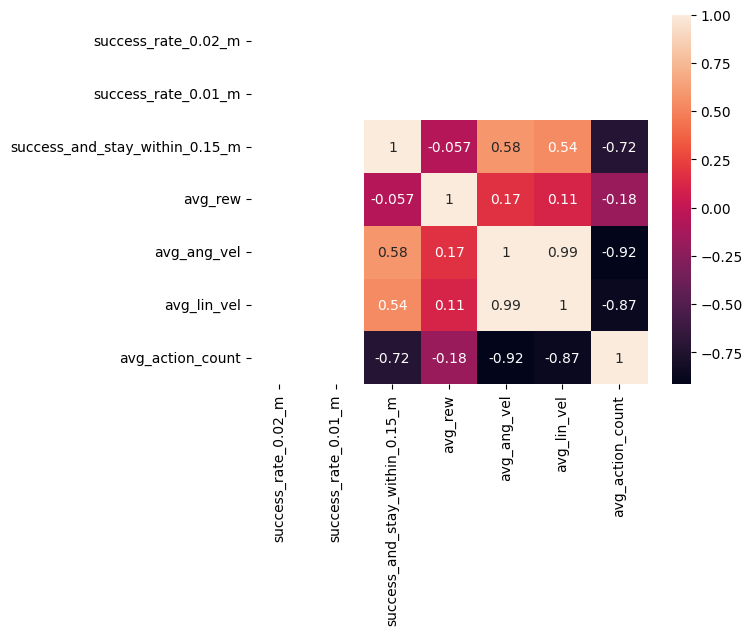

In [8]:
sns.heatmap(res_multi_linR.corr(), annot=True)

<AxesSubplot:>

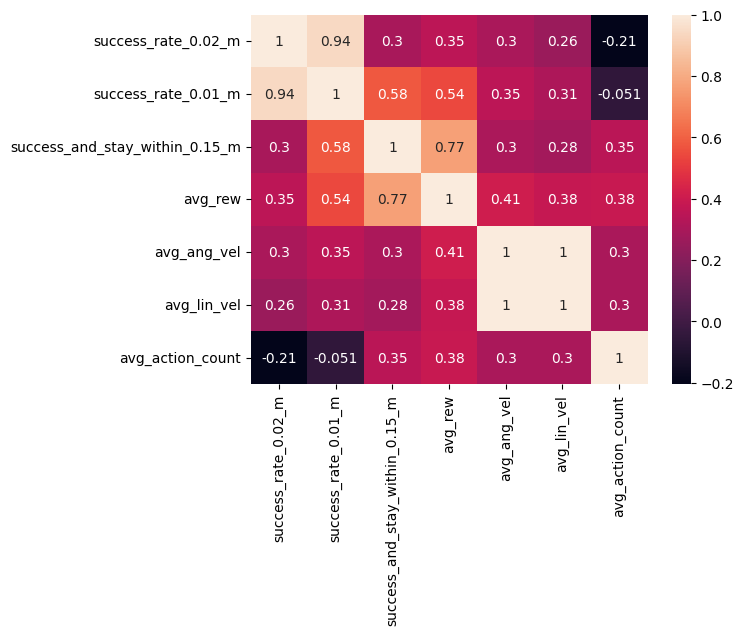

In [9]:
sns.heatmap(res_multi_expR.corr(), annot=True)

<AxesSubplot:>

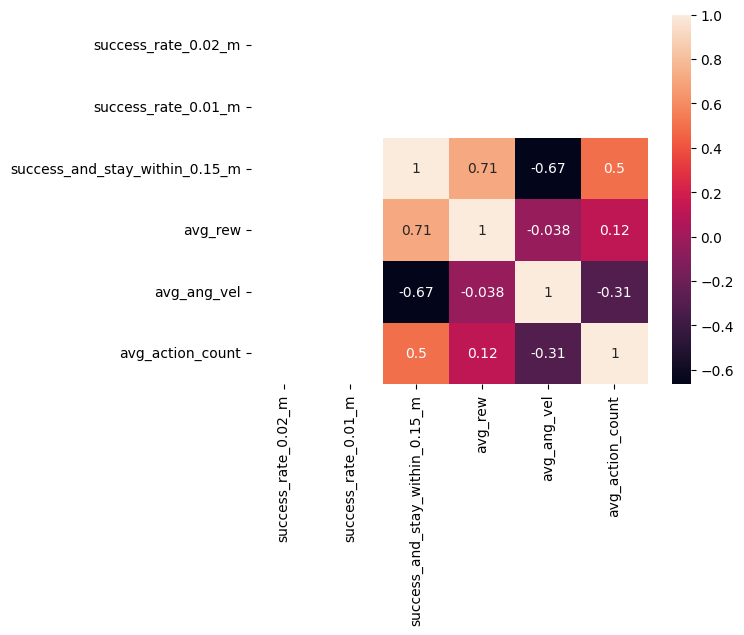

In [10]:
sns.heatmap(res_multi_expR_UF.corr(), annot=True)

In [13]:
res_multi_gotoPose = pd.read_csv("../evaluations/icra24_Pose/multi_model_performance.csv", index_col=[0])
res_multi_gotoPose_BB = pd.read_csv("../evaluations/icra24_Pose/multi_model_performance_BB.csv", index_col=[0])

In [14]:
res_multi_gotoPose = pd.concat([res_multi_gotoPose, res_multi_gotoPose_BB])
res_multi_gotoPose

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_lin_vel,avg_action_count
0,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.05,100.000000,100.000000,99.607843,1.749921,0.155008,0.416510,41.55500
1,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.03,99.604743,95.256917,99.209486,1.709240,0.160117,0.420421,56.54575
2,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.01,100.000000,98.818898,100.000000,1.747482,0.114965,0.391630,112.66125
3,nominal_UF_0.25_GoToPose_MLP_expRew,100.000000,99.218750,100.000000,1.741328,0.099687,0.412432,136.99475
4,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.04,100.000000,100.000000,99.603175,1.754319,0.159498,0.406643,47.20100
5,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.02,100.000000,100.000000,99.609375,1.773422,0.117706,0.391574,102.33600
0,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.05,100.000000,99.212598,100.000000,1.725720,0.151655,0.421744,40.57925
1,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.02,100.000000,99.215686,100.000000,1.743725,0.131494,0.395166,92.52575
2,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.03,100.000000,100.000000,99.604743,1.762112,0.141950,0.400856,74.10575
3,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.01,100.000000,97.647059,100.000000,1.747792,0.110860,0.394218,118.66900


In [22]:
#res_multi_gotoPose.to_csv("../evaluations/icra24_Pose/multi_model_performance_thr_0.1.csv")

<AxesSubplot:>

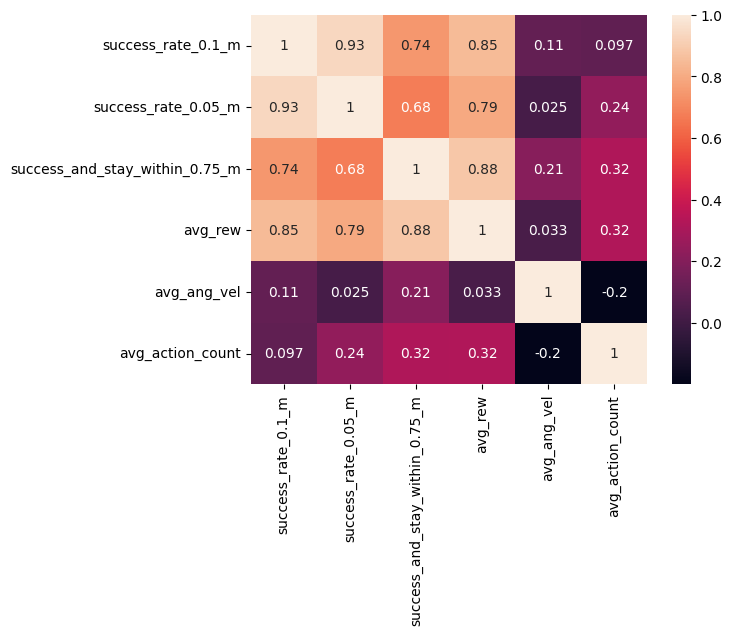

In [23]:
sns.heatmap(res_multi_gotoPose.corr(), annot=True)